In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2016-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2016_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,해운대구,17760,해운대구,9585,117.25%,"11,505"
1,2016-01-07,간장,오복왕표 0.9ℓ 1병,3755,해운대구,6250,해운대구,2495,66.44%,"4,985"
2,2016-01-07,달걀,오경슈퍼란60g정도 10개,1993,해운대구,2800,해운대구,807,40.49%,"2,464"
3,2016-01-07,닭고기,육계 1.0㎏,4800,해운대구,5980,해운대구,1180,24.58%,"5,511"
4,2016-01-07,대파,1.0㎏,3179,해운대구,5737,해운대구,2558,80.47%,"4,409"
5,2016-01-07,돼지고기,삼겹살 500g,8250,해운대구,9500,해운대구,1250,15.15%,"8,917"
6,2016-01-07,두부,500g 판두부(국산포장두부 420g) 1모,4089,해운대구,4365,해운대구,276,6.75%,"4,218"
7,2016-01-07,라면,신라면 120g 1봉지,630,해운대구,630,해운대구,0,0.0%,630
8,2016-01-07,맥주,하이트 500㎖ 1병,1240,해운대구,1350,해운대구,110,8.87%,"1,277"
9,2016-01-07,무,2.0㎏ 1개,1298,해운대구,2666,해운대구,1368,105.39%,"1,867"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2016-04-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2016_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-04-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,해운대구,17760,해운대구,11085,166.07%,"11,005"
1,2016-04-07,간장,오복왕표 0.9ℓ 1병,3754,해운대구,6250,해운대구,2496,66.49%,"4,985"
2,2016-04-07,달걀,오경슈퍼란60g정도 10개,1960,해운대구,2800,해운대구,840,42.86%,"2,413"
3,2016-04-07,닭고기,육계 1.0㎏,4800,해운대구,7990,해운대구,3190,66.46%,"6,004"
4,2016-04-07,대파,1.0㎏,2592,해운대구,5264,해운대구,2672,103.09%,"4,119"
5,2016-04-07,돼지고기,삼겹살 500g,8600,해운대구,9950,해운대구,1350,15.7%,"9,383"
6,2016-04-07,두부,500g 판두부(국산포장두부 420g) 1모,4089,해운대구,4365,해운대구,276,6.75%,"4,273"
7,2016-04-07,라면,신라면 120g 1봉지,630,해운대구,630,해운대구,0,0.0%,630
8,2016-04-07,맥주,하이트 500㎖ 1병,1240,해운대구,1350,해운대구,110,8.87%,"1,277"
9,2016-04-07,무,2.0㎏ 1개,2240,해운대구,2958,해운대구,718,32.05%,"2,586"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2016-07-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2016_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-07-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,해운대구,8880,해운대구,705,8.62%,"8,545"
1,2016-07-07,간장,오복왕표 0.9ℓ 1병,3754,해운대구,6250,해운대구,2496,66.49%,"4,918"
2,2016-07-07,고등어,30㎝정도 500g 1마리,3990,해운대구,6857,해운대구,2867,71.85%,"5,334"
3,2016-07-07,달걀,오경슈퍼란60g정도 10개,1960,해운대구,2800,해운대구,840,42.86%,"2,413"
4,2016-07-07,닭고기,육계 1.0㎏,5980,해운대구,8990,해운대구,3010,50.33%,"7,025"
5,2016-07-07,대파,1.0㎏,2128,해운대구,4698,해운대구,2570,120.77%,"3,446"
6,2016-07-07,돼지고기,삼겹살 500g,10000,해운대구,11950,해운대구,1950,19.5%,"10,983"
7,2016-07-07,두부,500g 판두부(국산포장두부 420g) 1모,4089,해운대구,4365,해운대구,276,6.75%,"4,273"
8,2016-07-07,라면,신라면 120g 1봉지,588,해운대구,600,해운대구,12,2.04%,593
9,2016-07-07,맥주,하이트 500㎖ 1병,1240,해운대구,1350,해운대구,110,8.87%,"1,277"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2016-10-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2016_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-10-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6906,해운대구,7425,해운대구,519,7.52%,"7,157"
1,2016-10-06,간장,오복왕표 0.9ℓ 1병,4750,해운대구,6250,해운대구,1500,31.58%,"5,687"
2,2016-10-06,고등어,30㎝정도 500g 1마리,2682,해운대구,4729,해운대구,2047,76.32%,"3,467"
3,2016-10-06,달걀,오경슈퍼란60g정도 10개,1963,해운대구,2800,해운대구,837,42.64%,"2,514"
4,2016-10-06,닭고기,육계 1.0㎏,5390,해운대구,6106,해운대구,716,13.28%,"5,825"
5,2016-10-06,대파,1.0㎏,3392,해운대구,4600,해운대구,1208,35.61%,"4,084"
6,2016-10-06,돼지고기,삼겹살 500g,7900,해운대구,9950,해운대구,2050,25.95%,"9,250"
7,2016-10-06,두부,500g 판두부(국산포장두부 420g) 1모,4089,해운대구,4365,해운대구,276,6.75%,"4,273"
8,2016-10-06,라면,신라면 120g 1봉지,630,해운대구,630,해운대구,0,0.0%,630
9,2016-10-06,맥주,하이트 500㎖ 1병,1240,해운대구,1350,해운대구,110,8.87%,"1,277"


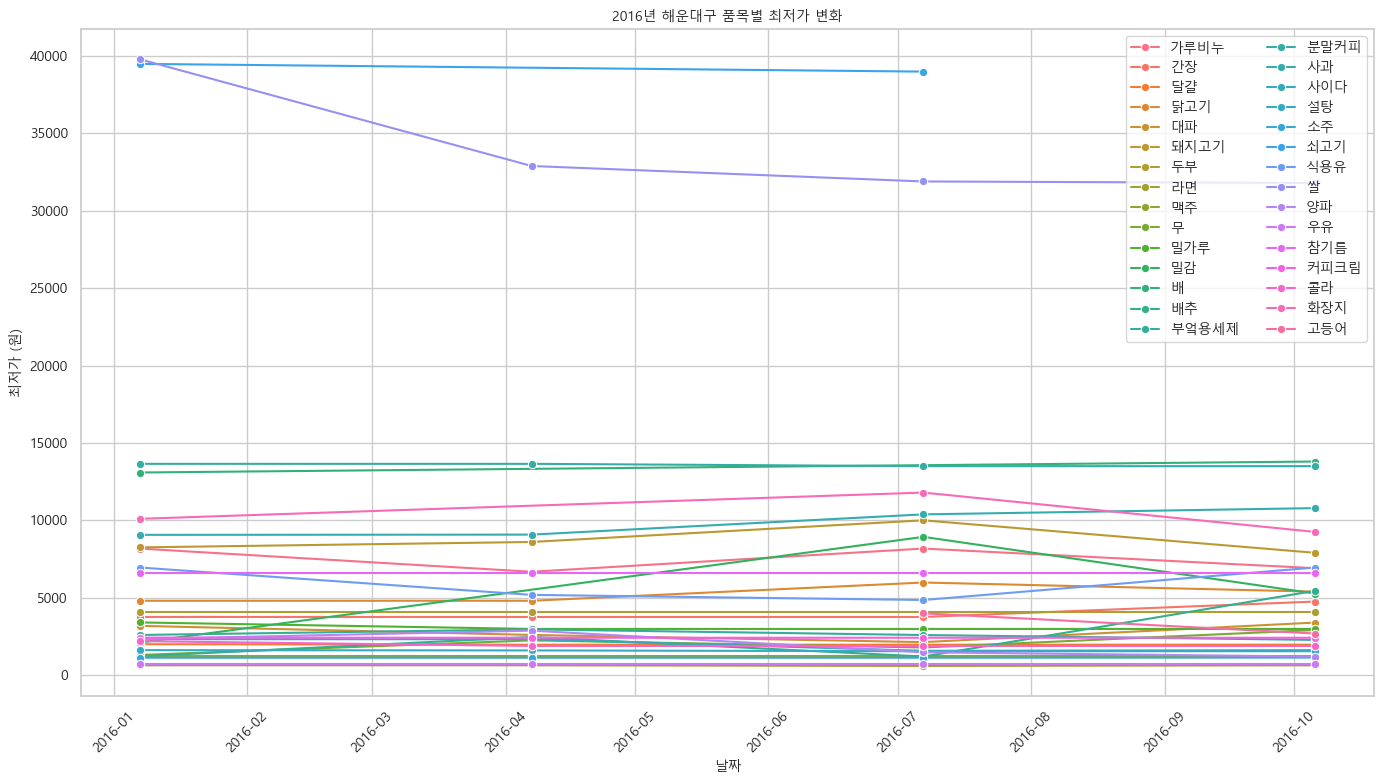

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2016_1q.csv")
q2 = pd.read_csv("해운대구2016_2q.csv")
q3 = pd.read_csv("해운대구2016_3q.csv")
q4 = pd.read_csv("해운대구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2016_min.csv", index=False, encoding="utf-8-sig")

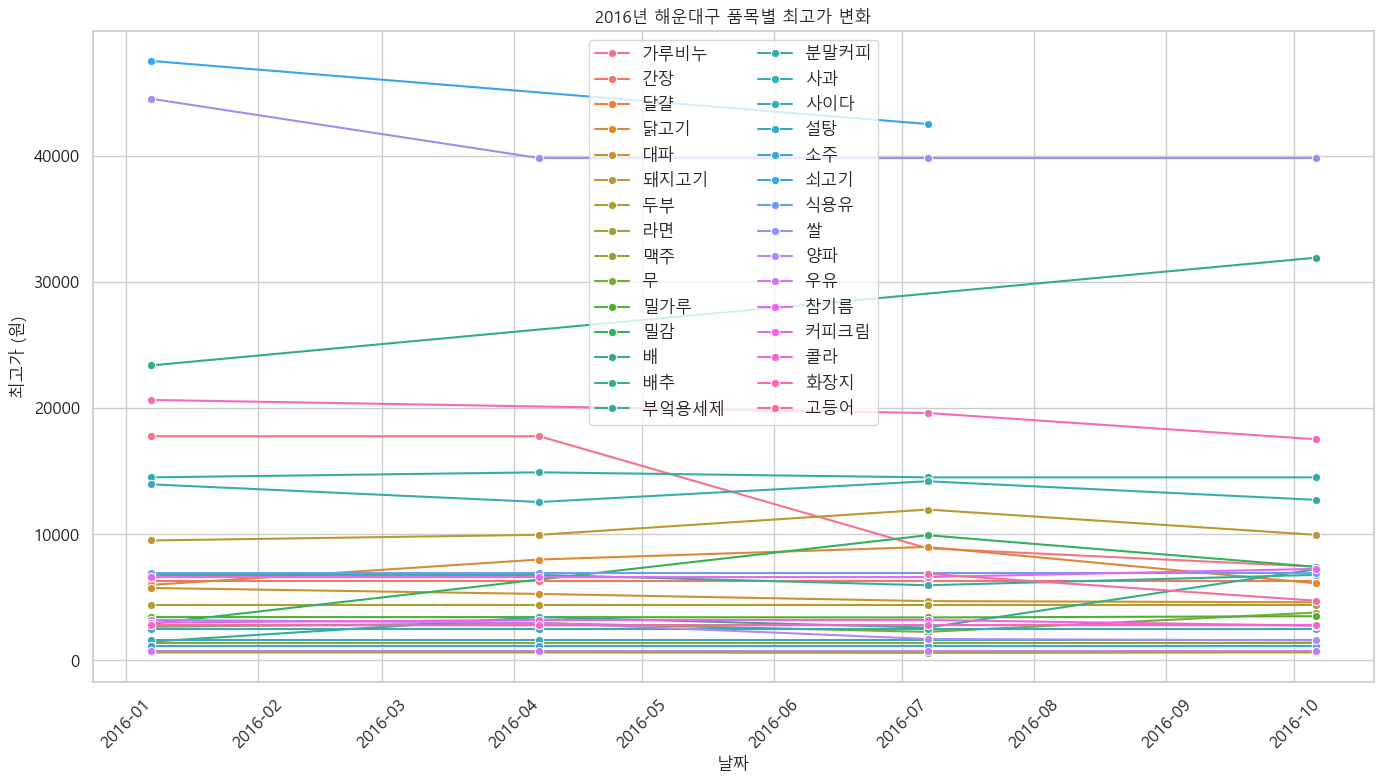

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2016_1q.csv")
q2 = pd.read_csv("해운대구2016_2q.csv")
q3 = pd.read_csv("해운대구2016_3q.csv")
q4 = pd.read_csv("해운대구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2016_max.csv", index=False, encoding="utf-8-sig")